In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

# Week 08 (Monday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


with contributions totally ripped off from Gautham Narayan (UIUC), Michael Steinbach (UMN), and Nico Adams (UMN)

# Where do we stand?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression

# Last Class: Gaussian Processes

# This Class: Decision Trees / Regression

## What is Machine Learning ?

* The umbrella term "machine learning" describes methods for *automated data analysis*, developed by computer scientists and statisticians in response to the appearance of ever larger datasets.

* What is actually being learned? With GPs, you **specified** the functional form for the correlation between observations in your training set. With ML, you specify a notion of how to measure the distance between observations, and it learns the correlation structure and builds a model, $M$. 

* The goal of automation has led to an emphasis on non-parametric models (that adapt to dataset size and complexity), and a very uniform terminology that enables multiple models to be implemented and compared on an equal footing.

* Machine learning can be divided into two types: *supervised* and *unsupervised.* (this is for future classes)

## Supervised Learning

* Supervised learning is also known as *predictive* learning. Given *inputs* $X$, the goal is to construct a machine that can accurately predict a set of *outputs* $y$, usually so that _decisions_ can be made. 


* The "supervision" refers to the education of the machine, via a *training set* $D$ of input-output pairs that we provide. Prediction accuracy is then tested on *validation* and *test* sets.

## Supervised Learning

* At the heart of the prediction machine is a *model* $M$ that can be *trained* to give accurate predictions.

* Supervised learning is about making predictions by characterizing ${\rm Pr}(y_k|x_k,D,M)$.

* The outputs $y$ are said to be *response variables* - predictions of $y$ will be generated by our model. 

* The variables $y$ can be either *categorical* ("labels") or *nominal* (real numbers).

* When the $y$ are numerical, the problem is a *regression* ("how should we interpolate between these numerical values?").

<img src="figures/house_price_features.png">

<img src="figures/house_price_features_corr.png">

<img src="figures/ml_map.png"></img>

> The [`scikit-learn` algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), as provided with the package documentation.

## Data Representations

* Each input $x$ is said to have $P$ *features* (or *attributes*), and represents a *sample* (assumed to have been drawn from a sampling distribution). Each sample input $x$ is associated with an output $y$.


* Our $N$ input *samples* are packaged into an $N \times P$ *design matrix* $X$ (with $N$ rows and $P$ columns). We've used this term before in the context of regression and you saw an example of building one with the HBM on Cepheids

<img src="figures/ml_data_representation.svg" width=100%>

* Typically a supervised learning model is "trained" on a subset of the data, and then its ability to make predictions about new data "tested" on the remainder.

* Training involves "fitting" the model to the data, optimizing its parameters to minimize some "loss function" (or equivalently, maximize some defined "score").

<img src="figures/ml_supervised_workflow.svg" width=100%>

<img src="figures/ml_train_test_split_matrix.svg" width=100%>

## Optimizing Model Prediction Accuracy

* In supervised machine learning the goal is to make the most accurate predictions we can - which means neither over-fitting nor under-fitting the data 

* The "mean squared error" between the model predictions and the truth is a useful metric: minimizing MSE corresponds to minimizing the "empirical risk," defined as the mean value loss function averaged over the available data samples, where the loss function is quadratic

<img src="figures/overfitting_underfitting_cartoon.png">

## Decision Tree Methods

The hierarchical application of decision boundaries lead to decision trees

Tree structure:

- top node contains the entire data set
- at each branch the data are subdivided into **two** child nodes (this is the decision)
- split is based on a predefined decision boundary (usually axis aligned)
- splitting repeats, recursively, until we reach a predefined stopping criteria


Application of the tree to classification is simple (a series of binary decisions). 

The fraction of points from the training set classified as one class or the other defines the class associated with the decision.

## OK, so how to pick what decision to make? 

i.e. How do we choose the best attribute to divide the data set on

You need a **metric** to measure how good your feature is at predicting the desired output

`sklearn` gives you two options
- Entropy
    - and a related quantity, the Information Gain
- Gini index

We are performing top-down search through the space of possible decision trees, and optimizing this metric

## Entropy:

The entropy (we've seen this before):
\begin{equation}
\huge
H(S)=\sum_{i=1}^{c}-p_{i} \log _{2} p_{i}
\end{equation}

If you imagine a system with two states $S$ (+) and (-) then visually:

<img src="entropy_twoclass.png">

States with low entropy having high *purity* - they're more homogenous 

If a state has an entropy that is greater than zero, you can keep trying to make decisions - i.e. split further



In [1]:
# You can compute the entropy with scipy pretty easily, but practically you won't have to do this manually
import numpy as np
import scipy.stats as st
pick1 = np.arange(0, 8, 1)
for p1 in pick1:
    p2 = 14 - p1
    print(f'Entropy for {p1, p2}: {st.entropy([p1,p2], base=2):.2f}')


Entropy for (0, 14): 0.00
Entropy for (1, 13): 0.37
Entropy for (2, 12): 0.59
Entropy for (3, 11): 0.75
Entropy for (4, 10): 0.86
Entropy for (5, 9): 0.94
Entropy for (6, 8): 0.99
Entropy for (7, 7): 1.00


## Information gain:

in terms of the Entropy


\begin{equation}
\huge
I(\text{parent}, \text{child})=H(\text{parent})-H(\text{parent}|\text{child})
\end{equation}

The second term has two values since each parent node in the decision tree has two children - weight by fraction of the population at each child (default - there are other weighting schemes).


You can measure the entropy with a log of any base, but 2 is conventional because in that case, the entropy is in units of *binary digits* or **bits.** 

This can be directly interpreted in the information processing sense as the number of bits required to represent the event. 

This quantity is also often called the **Kullback Leibler divergence** or just **KL divergence**

\begin{equation}
\huge
I(\text{parent}, \text{child})=H(\text{parent})-H(\text{parent}|\text{child})
\end{equation}

# <center> This is a distance </center>

This is really what we are specifying with all ML algorithms

Note the difference with what we did earlier
* with parameteric methods, you defined the model in terms of parameters you knew were interesting
    * and wrote down a likelihood which is a distance between your model and some of the observations (a training set)

* With non-parametric methods, you didn't define a model, but you did define some basis (sines or Gaussians but many other options) 
    * expressed in terms of the variable you decided were interesting (time/position/whatever)
    * and wrote down a form for the correlation between different values of that variable - the kernel
    * you held out some of your observations as a training set 
    * which let you compute a covariance matrix given your kernel 
    * which let you write down a likelihood which is a distance between the conditioned model and the training set

* Now you aren't even defining what the variables in the model are, but you are defining a measure of importance that can be used to weight each state in your model
    * and a form for the distance between two states in terms of infromation that is gained or loss - a **loss function**
    * and you hold out some of your observations as a training set
    * and minimize the loss function to condition the model
    * which in supervised learning is reducing the entropy at each node (i.e. making decisions such that the output is a more homogenous subset)
                    

## Gini Impurity

1. Randomly pick a datapoint in our dataset
2. Randomly classify it according to the class distribution in the dataset
    (i.e. if you 6 red, 2 green, 3 blue things in some dataset with 11 samples, then (6/11, 2/11 and 3/11 respectively)
    
### What’s the probability we classify the datapoint (in)correctly? 

The answer to that question is the Gini (Im)purity.

\begin{equation}
\huge
G(S)=\sum_{i=1}^{C} p(i) \cdot(1-p(i))
\end{equation}

And the Gini gain

\begin{equation}
\huge
I(\text{parent}, \text{child})=G(\text{parent})-G(\text{parent}|\text{child})
\end{equation}

Yup. This is a distance.


# In-class warm-up: Look at the table below and pick the feature that is best to split on first

#### Remember that you only get to make a binary split (i.e. mild or not mild)

In [2]:
# RUN THIS
import astropy.table as at
import graphviz 
weather = at.Table.read('data/weather_nominal.csv', format='ascii')
weather

outlook,temperature,humidity,windy,play
str8,str4,str6,str5,str3
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes


# Implementing a Single Decision Tree

In [3]:
# RUN THIS

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# convert the labels to numerical data
cols = []
new_weather = weather.copy()
for i, feature in enumerate(weather.colnames):
    le = preprocessing.LabelEncoder()
    new_weather[feature] = le.fit_transform(weather[feature])*1.
new_weather = new_weather.to_pandas()
new_weather

,outlook,temperature,humidity,windy,play
0,2.0,1.0,0.0,0.0,0.0
1,2.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0
5,1.0,0.0,1.0,1.0,0.0
6,0.0,0.0,1.0,1.0,1.0
7,2.0,2.0,0.0,0.0,0.0
8,2.0,0.0,1.0,0.0,1.0
9,1.0,2.0,1.0,0.0,1.0


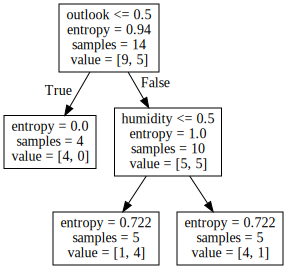

In [4]:
# get the training features and target
X_train = new_weather[weather.colnames[0:4]]
Y_train = 1.-new_weather['play']

# TWO LINES OF CODE TO IMPLEMENT A DECISION TREE

# build the decision tree
clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy')

# Step 3: Train the model on the data
clf.fit(X_train, Y_train)

# Plot the Tree
dot_data = tree.export_graphviz(clf, feature_names= weather.colnames[0:4], out_file=None) 
graph = graphviz.Source(dot_data)
graph

Decision trees are simple to interpret (a set of questions).

[This structure is called a Dendrogram](https://en.wikipedia.org/wiki/Dendrogram)

<img src="figures/tree_components.png">

Remember the bias-variance tradeoff?
<img src="figures/overfitting_underfitting_cartoon.png">

# There's not a lot you can do with a tree structure:
<img src="figures/tree_depth.png">

## Limiting Model Complexity
<img src="figures/tree_limit.png">

## Pruning - getting rid of leaves that don't have large information/gini gain
<img src="figures/tree_pruning.png">

# In-class warm-up: Predicting Survival from the Titanic Sinking

This is the "Hello World" of Kaggle challenges.

<img src="figures/titanic-sinking-hoyt.jpg">

We'll read in the file `titanic_train.csv`

Here's a description of the columns
<img src="figures/titanic_data.png">

Pick columns (i.e. features) that you think might have an impact on survival

**CAUTION**: Some of these features may be missing for some samples - i.e. there is missing data for some people - if you use astropy (> 4.0) it will construct a table with masked columns. If you use an older astropy or pandas, you will need to modify your code accordingly. Irrespective, drop samples with NaN values. There should be 714 passengers after that. 

## BUILD A DECISION TREE AND DETERMINE WHAT VARIABLES ARE IMPORTANT 

In [5]:
# RUN THIS

import numpy as np
%matplotlib inline
from astropy.visualization import hist
import sklearn
from sklearn import metrics

In [6]:
# RUN THIS

# Read in the data
train = at.Table.read('data/titanic_train.csv', format='ascii')

# mask out rows that are NaNs
train = train[~train['Age'].mask]

# Look at the data
train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
int64,int64,int64,str82,str6,float64,int64,int64,str18,float64,str15,str1
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,--,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,--,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,--,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,--,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,--,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,--,C


In [7]:
# RUN THIS
X_train = train['Pclass', 'Sex', 'Age']
X_train['Pclass'] = np.array(X_train['Pclass']).astype('f8')
X_train['Sex'] = [1. if s =='female' else 0. for s in train['Sex']]

Y_train = np.array(train['Survived']).astype('f8')
X_train = X_train.to_pandas()


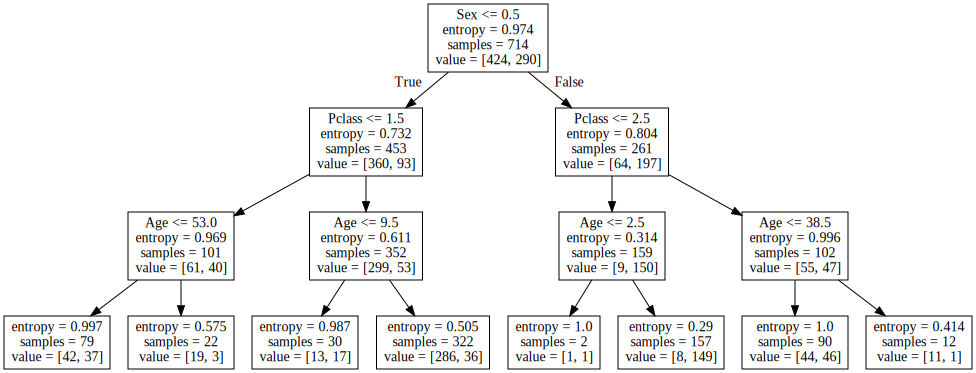

In [8]:

# TWO LINES OF CODE TO IMPLEMENT A DECISION TREE

# build the decision tree
clf = DecisionTreeClassifier(max_depth = 3, criterion='entropy')

# Step 3: Train the model on the data
clf.fit(X_train, Y_train)

# Plot the Tree
dot_data = tree.export_graphviz(clf, feature_names= ['Pclass', 'Sex', 'Age'], out_file=None) 
graph = graphviz.Source(dot_data)
graph

## Regression with Trees: When the target variable is nominal 

<img src="figures/tree_regression.png">

## But you say 

### AH BUT ENTROPY AND GINI IMPURITY ARE DEFINED AS MARGINALS OVER CATEGORICAL VARIABLES, WOE IS ME HOW COULD THESE DISTANCE METRICS EVER POSSIBLY WORK FOR VARIABLES THAT ARE CONTINUOUS 

(Well ok maybe you don't say exactly that...)


<img src="figures/tree_regression_metric.png">

Hello old friends.

## The big issues with trees

* Variance - different trees lead to different results
    - intuitively if you have just two continuous variables, then calculating the split for every node even with a depth = 2 tree is of order $\infty^2$
    
You can view each tree as a single path that you can take do get the desired outcome.

There are many possible paths, so we do the thing we always do and marginalize over them.

In other words, go from a single decision tree to a many decision trees.


Two common ensemble methods that use decision trees:

1. Random Forests
    - Trees run in parallel, independent of each other
    - Each tree uses a random subset of the observations and features (**bagging**)
        - the number of features selected per split level is typically limited to the square root of the total number of features
    - Class predicted by majority vote - what class do most trees think an observation belongs to or average in the case of regression



2. Gradient Boosted Trees
    - Trees run in series 
    - Each tree uses different weights for the features, updating the weights from the previous tree
    - The last tree makes the prediction

# In-class warm-up: using Random Forests for regression using SDSS galaxies with known redshifts (the target) and magnitudes as features - i.e. a photo-z estimator.

@pickle_results: computing results and saving to 'photoz_forest.pkl'


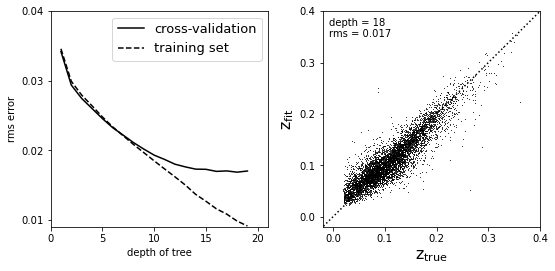

In [9]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_forest.pkl')
def compute_photoz_forest(depth):
    rms_test = np.zeros(len(depth))
    rms_train = np.zeros(len(depth))
    i_best = 0
    z_fit_best = None

    for i, d in enumerate(depth):
        clf = RandomForestRegressor(n_estimators=10,max_features=3,
                                    max_depth=d, random_state=0)
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.sqrt(np.mean((z_fit_train - z_train) ** 2))
        rms_test[i] = np.sqrt(np.mean((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best


depth = np.arange(1, 20)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(depth)
best_depth = depth[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(depth, rms_test, '-k', label='cross-validation')
ax.plot(depth, rms_train, '--k', label='training set')
ax.legend(loc=1, prop=dict(size=13))

ax.set_xlabel('depth of tree')
ax.set_ylabel('rms error')

ax.set_xlim(0, 21)
ax.set_ylim(0.009,  0.04)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

# right panel: plot best fit
ax = fig.add_subplot(122)
ax.scatter(z_test, z_fit_best, s=1, lw=0, c='k')
ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.03, 0.97, "depth = %i\nrms = %.3f" % (best_depth, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\rm z_{true}$', fontsize=16)
ax.set_ylabel(r'$\rm z_{fit}$', fontsize=16)

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

# In-class exercise: using Gradient Boosting for regression on the same data set

@pickle_results: computing results and saving to 'photoz_boosting.pkl'


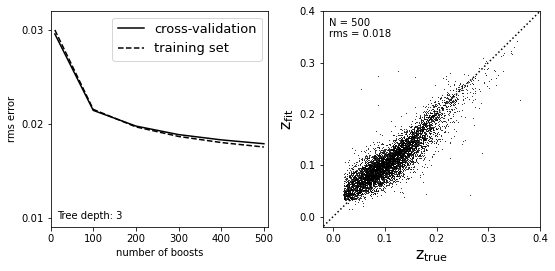

In [10]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_boosting.pkl')
def compute_photoz_forest(N_boosts):
    rms_test = np.zeros(len(N_boosts))
    rms_train = np.zeros(len(N_boosts))
    i_best = 0
    z_fit_best = None

    for i, Nb in enumerate(N_boosts):
        clf = GradientBoostingRegressor(n_estimators=Nb, learning_rate=0.1,
                                        max_depth=3, random_state=0)
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.sqrt(np.mean((z_fit_train - z_train) ** 2))
        rms_test[i] = np.sqrt(np.mean((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best

N_boosts = (10, 100, 200, 300, 400, 500)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(N_boosts)
best_N = N_boosts[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(N_boosts, rms_test, '-k', label='cross-validation')
ax.plot(N_boosts, rms_train, '--k', label='training set')
ax.legend(loc=1, prop=dict(size=13))

ax.set_xlabel('number of boosts')
ax.set_ylabel('rms error')
ax.set_xlim(0, 510)
ax.set_ylim(0.009,  0.032)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax.text(0.03, 0.03, "Tree depth: 3",
        ha='left', va='bottom', transform=ax.transAxes)

# right panel: plot best fit
ax = fig.add_subplot(122)
ax.scatter(z_test, z_fit_best, s=1, lw=0, c='k')
ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.03, 0.97, "N = %i\nrms = %.3f" % (best_N, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\rm z_{true}$', fontsize=16)
ax.set_ylabel(r'$\rm z_{fit}$', fontsize=16)

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

# Appendix: Introduction to Machine Learning

## Supervised Learning

* When the $y$ are categorical, the problem is one of *classification* ("is this an image of a `dog`, or my `dinner`?"). 

<img src="figures/dog_or_dinner.jpg">

## Unsupervised Learning

* Also known as *descriptive* learning. Here the goal is "knowledge discovery" - detection of patterns in a dataset, that can then be used in supervised/model-based analyses. 


* Unsupervised learning is about *density estimation* - characterizing ${\rm Pr}(x|\theta,H)$.

## Unsupervised Learning

* Examples of unsupervised learning activities include:

  * Clustering analysis of the $x$.
  * Dimensionality reduction: principal component analysis, independent component analysis, etc.
  
  
<img src="figures/ul_stocks_all.jpg">

<img src="figures/ul_clusters.png">

Credit: Lorien Hayden (Cornell)

<img src="figures/ul_sectors.png">

Credit: Lorien Hayden (Cornell)

<img src="figures/ul_stocks.png">

Credit: Lorien Hayden (Cornell)

<img src="figures/ul_portfolio.png">

Credit: Lorien Hayden (Cornell)

## But of course individual members of a population can look wildly different, so clustering is nice, but we want our  regression and forecasting infrastructure as well. 

## Even these can be affected by unforseen circumstances though.

<img src="figures/ul_stocks_after_data_breach.png">

<img src="figures/ul_vs_sl1.png">

<img src="figures/ul_vs_sl2.png">

<img src="figures/ul_vs_sl3.png">

<img src="figures/ul_vs_sl4.png">

<img src="figures/ul_vs_sl5.png">

<img src="figures/ul_vs_sl6.png">

<img src="figures/ul_vs_sl7.png">

## Machine Learning Models

Examples of data-driven, non-parametric models for use in supervised learning include K-nearest neighbors, Support Vector Machines, Random Forest, Neural Networks, and many more. 

Many can be used for either classification or regression.

All have a number of **hyper-parameters** that govern their overall behavior, that need to be determined for any given dataset.


$\;\;\;\;\;{\rm MSE} = \mathcal{E} \left[ (\hat{y} - y^{\rm true})^2 \right] = \mathcal{E} \left[ (\hat{y} - \bar{y} + \bar{y} - y^{\rm true})^2 \right] = \mathcal{E} \left[ (\hat{y} - \bar{y})^2 \right] + (\bar{y} - y^{\rm true})^2$

$\;\;\;\;\;\;\;\;\;\;\;\;\; = {\rm var}(\hat{y}) + {\rm bias}^2(\hat{y})$


* In general, different models reach different balances between the variance and bias of their predictions

* A particular choice of loss function leads to a corresponding minimized risk

## Cross-Validation

* With a single training/test split, one can characterize the _prediction error_ using, for example, the MSE. 

* The model that minimizes the *generalized prediction error* can be found (approximately) with *cross validation*, in which we consider multiple training/test splits, and look at the _mean prediction error_ across all of these _"folds."_

* How we design the folds matters: we want each subset of the data to be a _fair sample_ of the whole.

<img src="figures/ml_grid_search_cross_validation.svg" width=100%>

* Another layer of cross validation is still needed, since we need to guard against over-fitting to this particular training set: we need to try all possible training sets.

* Once we have the hyperparameters that optimize the generalized prediction error, we can then fix them at their optimal values and train on model on the entire data set.

## Caveat Emptor

* Machine learning algorithms are designed to make good use of big, complex datasets, where there are likely to be many more correlations and connections than we have thought of yet. 


* In this approach we assume that we will be able to make better predictions by using flexible, "non-parametric" methods that scale with the size of the dataset and allow new relationships to emerge empirically


* Additional work needs to be done to extract a full Bayesian posterior PDF (or even frequentist confidence intervals) for the model parameters - which are typically not the focus of a machine learning analysis.

# Appendix: Ensemble Methods

## Ensemble Methods: Bagging

Run multiple different models on the same data and learn from the ensemble

We can improve the performance of decisions trees (especially when there are many features) by **bagging** (Bootstrap AGGregation). This averages the predictive results of a series of bootstrap samples.

For a sample of $N$ points in a training set, bagging generates $K$ equally sized bootstrap samples from which to estimate the function $f_i(x)$. The final estimator, defined by bagging, is then

\begin{equation}
\huge
f(x)=\frac{1}{K} \sum_{i}^{K} f_{i}(x)
\end{equation}


(Yep, this is just take the average of all the individual methods)

## Ensemble Methods: Boosting

Boosting is an ensemble approach motivated by the idea that combining many weak classifiers can result in an improved classification. 

Boosting creates models to attempt to correct the errors of the ensemble so far 
**i.e. we reweight the data based on how incorrectly the data were classified in the previous iteration.**

- if you have $N$ data points in your sample with features $x$, and target $y$

\begin{equation}
\large
x_{i} \in \mathbb{R}^{d}, y_{i} \in\{-1,1\}
\end{equation}
**initalize the weights to $1/N$**

- Run the classification $h$ (i.e. hypotheses) with a weak clasifier $t$ times and compute the weighted classification error for each classifier

\begin{equation}
\large
\epsilon = \frac{\sum_{i=1}^{N} w_{i} I\left(y_{i} \neq h_{j}\left(x_{i}\right)\right)}{\sum_{i=1}^{N} w_{i}}
\end{equation}

where $I$ is the indicator variable (1 if $y_i$ matches the hypotheses, 0 if not).

- The weight for each weak classifier is related to the weighted classification error

\begin{equation}
\large
\theta_{t}=\frac{1}{2} \ln \left(\frac{1-\epsilon_{t}}{\epsilon_{t}}\right)
\end{equation}

- each time reweight each sample $i$ based on the previous performance of the classifier $t$

For any classifier with accuracy higher than 50%, the weight is positive. 
The more accurate the classifier, the larger the weight.
For a classifer with less than 50% accuracy, the weight is negative.

\begin{equation}
\large
w_{t+1}=\frac{w_{t} \exp \left[-\theta_{t} y_{i} h_{t} \right]}{Z_{t}}
\end{equation}
        
Where the denominator is the normalization constant to make the sum of the weights 1. 

If a misclassified case is from a positive weighted classifier, the “exp” term in the numerator would be always larger than 1. 

**NOTE THAT A WEAK CLASSIFIER WITH A NEGATIVE WEIGHT STILL CONTRIBUTES**
(you can be wrong, but if you are wrong consistently, then you are still useful)

You can view this as just iteratively minimizing the exponential loss function

\begin{equation}
\huge
L(y, F(x))=E\left(e^{-y F(x)}\right)
\end{equation}

where $E$ is just weighted expectation value.

[I'll spare you the math](https://towardsdatascience.com/boosting-algorithm-adaboost-b6737a9ee60c)

- At the end of this procedure we allow the classifiers a weighted vote on the final classification

\begin{equation}
\huge
H(x)=\operatorname{sign}\left(\sum_{t=1}^{T} \theta_{t} h_{t}(x)\right)
\end{equation}

    
The most popular form of boosting is that of adaptive boosting (helpfully implemented in a package called **AdaBoost**)

A fundamental limitation of the boosted decision tree is the computation time for large data sets (they rely on a chain of classifiers).